In [1]:
import pickle
import os
import pandas as pd
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split as splt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
dfy = pd.read_csv("MILANO_wSCORE.csv")
dfx = pd.read_csv("PLIC-milano-processed.csv", sep=";")

/home/webvalley/anaconda3/envs/score/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,29,36,44,51,94,104,105,112,113,120,127,130,149,158,168,237,239,240,241,248,249,256,273,298) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dfx = dfx.replace(-1, np.nan).replace("-1", np.nan).replace(-1.0, np.nan)

In [5]:
dfx = dfx.loc[:, (dfx != 0).any(axis=0)]

In [6]:
dfx = dfx.dropna(how='any', axis=1)

In [7]:
y = dfy['SCORE'].values

In [8]:
dfx1 = dfx.select_dtypes(exclude=['object'])

In [9]:
dfx1 = dfx1.drop(labels = ['smoking', 'smoking recod', 'glucose', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1) #

In [10]:
X = dfx1.values

In [11]:
bina = 0
for i in range(X.shape[1]):
    if (np.amax(X[:,i]) == 1):
        bina += 1
print(bina)

40


In [12]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
dfx1.columns

Index(['angina', 'remote angina', 'antiaggregators', 'antidiabetics',
       'antihypertensives', 'arteriopathyortic', 'remote arteriopathyortic',
       'remote peripheral arteriopathy', 'COPD', 'bypass', 'remote bypass',
       'CHD', 'Remote CHD', 'cod pcs', 'cholecystectomy',
       'TORQUE AND ANGLE WRENCH', 'diabetes2 self', 'cerebral hemorrhage',
       'hepatopathies NS', 'ages', 'NS Drugs', 'fibrates', 'fibrillationary',
       'HDL', 'strokes', 'Remote stroke', 'IMA', 'Remote IMA',
       'hypertension self', 'silent ischaemia', 'remote silent ischaemia',
       'IVS', 'nephropathies NS', 'self obesity', 'PLACA',
       'SECONDARY PREVENTION', 'PTCA', 'Remote PTCA', 'imbalance',
       'remote decompensation', 'gender', 'statins', 'steatosis', 'TG', 'TIA',
       'Remote TIA'],
      dtype='object')

In [14]:
# 0   0.04   0.12   0.24   1
model.summary()
X = X/X.max(axis=0)
y = y/50
yy = np.zeros((y.shape[0], 4))
for i,yyy in enumerate(y):
    if(yyy < 0.01): # Low
        yy[i][0] = 1
    elif(yyy < 0.02): # Medium
        yy[i][1] = 1
    elif(yyy < 0.05): # High
        yy[i][2] = 1
    else: # Very High (aka Dead)
        yy[i][3] = 1 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                3008      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 5,220
Trainable params: 5,220
Non-trainable params: 0
_________________________________________________________________


In [15]:
print(np.amax(X))
print(np.amax(y))
X_tr, X_ts, y_tr, y_ts = splt(X, yy, test_size=0.25, random_state=42)
es = EarlyStopping(patience = 100, restore_best_weights = True)

1.0
0.9832266384694833


In [16]:
X.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [18]:
history = model.fit(X_tr, y_tr, validation_data=(X_ts, y_ts), epochs = 2000, callbacks = [es]) #

Instructions for updating:
Use tf.cast instead.
Train on 4335 samples, validate on 1445 samples
Epoch 1/2000
4335/4335 [==============================] - 0s 64us/step - loss: 1.2718 - acc: 0.4491 - val_loss: 1.1990 - val_acc: 0.5024
Epoch 2/2000
4335/4335 [==============================] - 0s 23us/step - loss: 1.2043 - acc: 0.4978 - val_loss: 1.1751 - val_acc: 0.5024
Epoch 3/2000
4335/4335 [==============================] - 0s 23us/step - loss: 1.1802 - acc: 0.4999 - val_loss: 1.1412 - val_acc: 0.5024
Epoch 4/2000
4335/4335 [==============================] - 0s 23us/step - loss: 1.1420 - acc: 0.5093 - val_loss: 1.0963 - val_acc: 0.5024
Epoch 5/2000
4335/4335 [==============================] - 0s 23us/step - loss: 1.1163 - acc: 0.5299 - val_loss: 1.0651 - val_acc: 0.5599
Epoch 6/2000
4335/4335 [==============================] - 0s 23us/step - loss: 1.0949 - acc: 0.5451 - val_loss: 1.0444 - val_acc: 0.5813
Epoch 7/2000
4335/4335 [==============================] - 0s 23us/step - loss: 1.0

4335/4335 [==============================] - 0s 23us/step - loss: 0.7099 - acc: 0.6946 - val_loss: 0.6182 - val_acc: 0.7599
Epoch 59/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.7029 - acc: 0.6971 - val_loss: 0.6158 - val_acc: 0.7578
Epoch 60/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.7098 - acc: 0.6916 - val_loss: 0.6145 - val_acc: 0.7495
Epoch 61/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.7029 - acc: 0.7006 - val_loss: 0.6088 - val_acc: 0.7626
Epoch 62/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.6980 - acc: 0.7003 - val_loss: 0.6106 - val_acc: 0.7606
Epoch 63/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.7030 - acc: 0.7001 - val_loss: 0.6082 - val_acc: 0.7668
Epoch 64/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.6907 - acc: 0.6971 - val_loss: 0.6082 - val_acc: 0.7481
Epoch 65/2000
4335/4335 [=======================

4335/4335 [==============================] - 0s 24us/step - loss: 0.6087 - acc: 0.7373 - val_loss: 0.5368 - val_acc: 0.7785
Epoch 118/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.6151 - acc: 0.7287 - val_loss: 0.5374 - val_acc: 0.7869
Epoch 119/2000
4335/4335 [==============================] - 0s 22us/step - loss: 0.6117 - acc: 0.7354 - val_loss: 0.5363 - val_acc: 0.7931
Epoch 120/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.6066 - acc: 0.7336 - val_loss: 0.5379 - val_acc: 0.7903
Epoch 121/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.6062 - acc: 0.7343 - val_loss: 0.5362 - val_acc: 0.7848
Epoch 122/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.6171 - acc: 0.7206 - val_loss: 0.5349 - val_acc: 0.7862
Epoch 123/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.6139 - acc: 0.7273 - val_loss: 0.5356 - val_acc: 0.7806
Epoch 124/2000
4335/4335 [================

4335/4335 [==============================] - 0s 23us/step - loss: 0.5799 - acc: 0.7486 - val_loss: 0.5152 - val_acc: 0.7924
Epoch 177/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5760 - acc: 0.7439 - val_loss: 0.5170 - val_acc: 0.7931
Epoch 178/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5621 - acc: 0.7456 - val_loss: 0.5181 - val_acc: 0.7834
Epoch 179/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.5828 - acc: 0.7456 - val_loss: 0.5164 - val_acc: 0.7903
Epoch 180/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5738 - acc: 0.7479 - val_loss: 0.5143 - val_acc: 0.7924
Epoch 181/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5683 - acc: 0.7481 - val_loss: 0.5175 - val_acc: 0.7855
Epoch 182/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5700 - acc: 0.7486 - val_loss: 0.5134 - val_acc: 0.7910
Epoch 183/2000
4335/4335 [================

4335/4335 [==============================] - 0s 22us/step - loss: 0.5532 - acc: 0.7610 - val_loss: 0.5040 - val_acc: 0.7875
Epoch 236/2000
4335/4335 [==============================] - 0s 22us/step - loss: 0.5533 - acc: 0.7493 - val_loss: 0.5039 - val_acc: 0.7952
Epoch 237/2000
4335/4335 [==============================] - 0s 22us/step - loss: 0.5517 - acc: 0.7509 - val_loss: 0.5053 - val_acc: 0.7848
Epoch 238/2000
4335/4335 [==============================] - 0s 22us/step - loss: 0.5507 - acc: 0.7550 - val_loss: 0.5071 - val_acc: 0.7917
Epoch 239/2000
4335/4335 [==============================] - 0s 22us/step - loss: 0.5472 - acc: 0.7608 - val_loss: 0.5044 - val_acc: 0.7910
Epoch 240/2000
4335/4335 [==============================] - 0s 21us/step - loss: 0.5510 - acc: 0.7585 - val_loss: 0.5018 - val_acc: 0.7938
Epoch 241/2000
4335/4335 [==============================] - 0s 21us/step - loss: 0.5550 - acc: 0.7589 - val_loss: 0.5062 - val_acc: 0.7889
Epoch 242/2000
4335/4335 [================

4335/4335 [==============================] - 0s 23us/step - loss: 0.5377 - acc: 0.7587 - val_loss: 0.4983 - val_acc: 0.7938
Epoch 295/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5360 - acc: 0.7652 - val_loss: 0.4998 - val_acc: 0.7875
Epoch 296/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5370 - acc: 0.7557 - val_loss: 0.4992 - val_acc: 0.7924
Epoch 297/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5379 - acc: 0.7601 - val_loss: 0.4983 - val_acc: 0.7958
Epoch 298/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5290 - acc: 0.7640 - val_loss: 0.5001 - val_acc: 0.7931
Epoch 299/2000
4335/4335 [==============================] - 0s 25us/step - loss: 0.5344 - acc: 0.7606 - val_loss: 0.5007 - val_acc: 0.7875
Epoch 300/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5396 - acc: 0.7659 - val_loss: 0.5015 - val_acc: 0.7882
Epoch 301/2000
4335/4335 [================

4335/4335 [==============================] - 0s 24us/step - loss: 0.5336 - acc: 0.7573 - val_loss: 0.4958 - val_acc: 0.7958
Epoch 354/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5255 - acc: 0.7626 - val_loss: 0.4949 - val_acc: 0.7889
Epoch 355/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5290 - acc: 0.7677 - val_loss: 0.4964 - val_acc: 0.7903
Epoch 356/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5257 - acc: 0.7633 - val_loss: 0.5071 - val_acc: 0.7827
Epoch 357/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5198 - acc: 0.7633 - val_loss: 0.4949 - val_acc: 0.7910
Epoch 358/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5255 - acc: 0.7642 - val_loss: 0.4944 - val_acc: 0.7924
Epoch 359/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5317 - acc: 0.7626 - val_loss: 0.5001 - val_acc: 0.7875
Epoch 360/2000
4335/4335 [================

4335/4335 [==============================] - 0s 23us/step - loss: 0.5198 - acc: 0.7728 - val_loss: 0.4949 - val_acc: 0.7924
Epoch 413/2000
4335/4335 [==============================] - 0s 22us/step - loss: 0.5083 - acc: 0.7719 - val_loss: 0.4934 - val_acc: 0.7924
Epoch 414/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5129 - acc: 0.7735 - val_loss: 0.4940 - val_acc: 0.7889
Epoch 415/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.5089 - acc: 0.7779 - val_loss: 0.4937 - val_acc: 0.7875
Epoch 416/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5110 - acc: 0.7719 - val_loss: 0.4972 - val_acc: 0.7875
Epoch 417/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5178 - acc: 0.7714 - val_loss: 0.4930 - val_acc: 0.7903
Epoch 418/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5273 - acc: 0.7659 - val_loss: 0.4940 - val_acc: 0.7979
Epoch 419/2000
4335/4335 [================

4335/4335 [==============================] - 0s 23us/step - loss: 0.5175 - acc: 0.7649 - val_loss: 0.4926 - val_acc: 0.7882
Epoch 472/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5092 - acc: 0.7749 - val_loss: 0.4951 - val_acc: 0.7875
Epoch 473/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.5112 - acc: 0.7749 - val_loss: 0.4938 - val_acc: 0.7931
Epoch 474/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5080 - acc: 0.7769 - val_loss: 0.4916 - val_acc: 0.7945
Epoch 475/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5109 - acc: 0.7767 - val_loss: 0.4941 - val_acc: 0.7875
Epoch 476/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5127 - acc: 0.7693 - val_loss: 0.4940 - val_acc: 0.7889
Epoch 477/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5023 - acc: 0.7762 - val_loss: 0.4935 - val_acc: 0.7855
Epoch 478/2000
4335/4335 [================

4335/4335 [==============================] - 0s 23us/step - loss: 0.5062 - acc: 0.7804 - val_loss: 0.4977 - val_acc: 0.7910
Epoch 531/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.4977 - acc: 0.7779 - val_loss: 0.4957 - val_acc: 0.7910
Epoch 532/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5019 - acc: 0.7760 - val_loss: 0.4948 - val_acc: 0.7903
Epoch 533/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5014 - acc: 0.7815 - val_loss: 0.4908 - val_acc: 0.7910
Epoch 534/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5090 - acc: 0.7714 - val_loss: 0.4923 - val_acc: 0.7896
Epoch 535/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.4985 - acc: 0.7866 - val_loss: 0.4921 - val_acc: 0.7903
Epoch 536/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.4943 - acc: 0.7779 - val_loss: 0.4921 - val_acc: 0.7917
Epoch 537/2000
4335/4335 [================

4335/4335 [==============================] - 0s 23us/step - loss: 0.4964 - acc: 0.7809 - val_loss: 0.4948 - val_acc: 0.7889
Epoch 590/2000
4335/4335 [==============================] - 0s 24us/step - loss: 0.4977 - acc: 0.7859 - val_loss: 0.4950 - val_acc: 0.7910
Epoch 591/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.4962 - acc: 0.7781 - val_loss: 0.4932 - val_acc: 0.7855
Epoch 592/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.4950 - acc: 0.7804 - val_loss: 0.4955 - val_acc: 0.7910
Epoch 593/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.5017 - acc: 0.7772 - val_loss: 0.4939 - val_acc: 0.7931
Epoch 594/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.4967 - acc: 0.7795 - val_loss: 0.4956 - val_acc: 0.7931
Epoch 595/2000
4335/4335 [==============================] - 0s 23us/step - loss: 0.4945 - acc: 0.7781 - val_loss: 0.4924 - val_acc: 0.7882
Epoch 596/2000
4335/4335 [================

4335/4335 [==============================] - 0s 27us/step - loss: 0.4859 - acc: 0.7896 - val_loss: 0.4968 - val_acc: 0.7917
Epoch 649/2000
4335/4335 [==============================] - 0s 27us/step - loss: 0.4954 - acc: 0.7795 - val_loss: 0.4940 - val_acc: 0.7869
Epoch 650/2000
4335/4335 [==============================] - 0s 26us/step - loss: 0.4865 - acc: 0.7832 - val_loss: 0.4933 - val_acc: 0.7924
Epoch 651/2000
4335/4335 [==============================] - 0s 28us/step - loss: 0.4928 - acc: 0.7799 - val_loss: 0.4927 - val_acc: 0.7896
Epoch 652/2000
4335/4335 [==============================] - 0s 28us/step - loss: 0.4876 - acc: 0.7827 - val_loss: 0.4919 - val_acc: 0.7875
Epoch 653/2000
4335/4335 [==============================] - 0s 28us/step - loss: 0.4921 - acc: 0.7848 - val_loss: 0.4938 - val_acc: 0.7924
Epoch 654/2000
4335/4335 [==============================] - 0s 25us/step - loss: 0.4959 - acc: 0.7762 - val_loss: 0.4932 - val_acc: 0.7889
Epoch 655/2000
4335/4335 [================

In [19]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

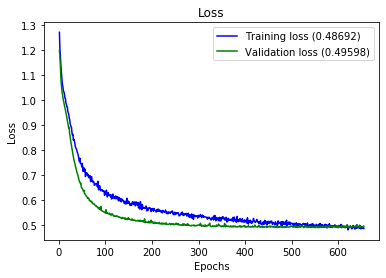

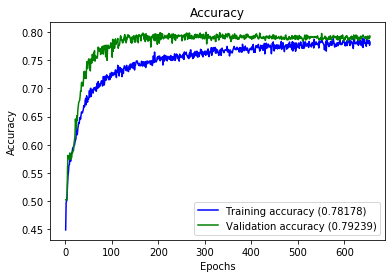

In [20]:
plot_history(history)

In [21]:
model.save("model_CC_ADAM_Classifier_DS2_NewThreshold_2000.h5")

In [22]:
pickle.dump(history, open("history_CC_ADAM_Classifier_DS2_NewThreshold_2000.pkl", "wb"))